In [ ]:
!pip install gdown
!pip install pycountry
!pip install geonamescache
!pip install unidecode

In [ ]:
import gdown
import ast
import pycountry
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geonamescache import GeonamesCache
from sklearn.neighbors import BallTree
from unidecode import unidecode
import warnings
warnings.filterwarnings('ignore')

# Datasets

## Downloading the datasets

In [ ]:
# file_id = '17ppqQeXwj5FhBMmdxnknqdyNPjz4ICyH'
# url = f'https://drive.google.com/uc?id={file_id}'

# gdown.download(url, 'shipments.csv', quiet=False)

# df_shipments = pd.read_csv('shipments.csv')

In [ ]:
# file_id = '1rx0I8XsNTvVWT5qvuM1CXVjZOwR2IjH9'
# url = f'https://drive.google.com/uc?id={file_id}'

# gdown.download(url, 'surveys.csv', quiet=False)

# df_surveys = pd.read_csv('surveys.csv')

In [ ]:
# file_id = '1wwEUdBk6qXQIecAM4-pk76GYc2yVtfKilk18trAummw'
# url = f'https://drive.google.com/uc?id={file_id}'

# gdown.download(url, 'tenders.csv', quiet=False)

# df_tenders = pd.read_csv('tenders.csv')

In [ ]:
df_shipments = pd.read_csv('/content/drive/MyDrive/diploma/Input datasets/shipments.csv')

In [ ]:
df_surveys = pd.read_csv('/content/drive/MyDrive/diploma/Input datasets/surveys.csv')

In [ ]:
df_tenders = pd.read_csv('/content/drive/MyDrive/diploma/Input datasets/tenders.csv')

## Processing the datasets

### Shipments df

In [ ]:
print(df_shipments.shape)
df_shipments.head()

(8018, 71)


,created_at,updated_at,deleted_at,id,inconsistent_lane_id,date,invoice_date,invoice_num,country_from,city_from,...,customs_transit,spot,coordinates_from,coordinates_to,confidence_location_match_from,confidence_location_match_to,validated_transport_type,transport_type,fact_date,customer_order_id
0,2025-01-25 00:28:13.646409+02,2025-01-25 00:28:13.646409+02,NaN,2024-2112,2024-2112,2024-07-05,2024-07-12,БТ-37/07/24,IT,Montegrosso D'asti,...,Чоп / Záhony,True,"{44.8199316,8.2359607}","{50.393051,30.2342611}",True,True,semi trailer - tautliner - standard,semi trailer - tautliner - standard,2024-07-08,2346901
1,2025-01-25 00:28:13.646409+02,2025-01-25 00:28:13.646409+02,NaN,2024-2113,2024-2113,2024-07-05,2024-07-17,БТ-57/07/24,PL,Wrocław,...,NaN,True,"{51.10929480000001,17.0386019}","{50.3125183,30.8601791}",True,True,semi trailer - tautliner - mega,semi trailer - tautliner - mega,2024-07-11,1003280911
2,2025-01-25 00:28:13.646409+02,2025-01-25 00:28:13.646409+02,NaN,2024-2114,2024-2114,2024-07-05,2024-07-16,BTP-47/07/24,IT,Pessione,...,Чоп / Záhony,True,"{44.9694566,7.840792599999999}","{50.393051,30.2342611}",True,True,semi trailer - tautliner - standard,semi trailer - tautliner - standard,2024-07-09,2346159
3,2025-01-25 00:28:13.646409+02,2025-01-25 00:28:13.646409+02,NaN,2024-2116,2024-2116,2024-07-05,2024-07-16,БТ-57/07/24,PL,Radomsko,...,NaN,True,"{51.0668544,19.4449387}","{50.5860677,30.9108214}",True,True,semi trailer - tautliner - mega,semi trailer - tautliner - mega,2024-07-10,1003278579
4,2025-01-25 00:28:13.646409+02,2025-01-25 00:28:13.646409+02,NaN,2024-2117,2024-2117,2024-07-08,2024-07-15,BEY-03/07/24,PL,Oława,...,Шегині / Medyka,True,"{50.9459276,17.2924017}","{50.4503596,30.5245025}",True,True,semi trailer - tautliner - standard,semi trailer - tautliner - standard,2024-07-10,39074428


In [ ]:
df_shipments.columns = df_shipments.columns.str.strip()
df_shipments.columns

Index(['created_at', 'updated_at', 'deleted_at', 'id', 'inconsistent_lane_id',
       'date', 'invoice_date', 'invoice_num', 'country_from', 'city_from',
       'zip_from', 'country_to', 'city_to', 'zip_to', 'organization',
       'flight_count', 'customer', 'customer_group', 'customer_amount',
       'customer_currency', 'payment_date', 'interbank_rate_payment_date',
       'commercial_rate_payment_date', 'customer_amount_eur',
       'customer_amount_uah', 'difference_field_from_flight', 'vat_reward_uah',
       'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'commission_eur', 'commission_uah',
       'euro_per_km_customer', 'euro_per_km_contractor1',
       'euro_per_km_contractor2', 'euro_per_km_contractor3',
       'euro_per_km_contractor4', 'total_km', 'outside_ukraine_km',
       'ukraine_km', 'logist1', 'logist2', 'logist3', 'logist4',
       'responsible_person_customer', 'p1_responsible_person_customer',
       'p2_responsible_person_customer', 'p3_responsible_person_customer',
       'p

In [ ]:
# leave rows without penalties and where flight = 1
df_shipments = df_shipments.loc[(df_shipments['flight_count'] == 1) & (df_shipments['penalty'] == "Ні")]
df_shipments.shape

(7779, 71)

In [ ]:
df_shipments['invoice_date'] = pd.to_datetime(df_shipments['invoice_date'].str.strip(), errors='coerce', utc=False)

In [ ]:
df_shipments['p1'] = df_shipments['p1'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else None)

In [ ]:
df_shipments['p1_sum_eur'] = df_shipments['p1'].apply(lambda d: d.get('p1_sum_eur') if isinstance(d, dict) else None)

### Surveys df

In [ ]:
print(df_surveys.shape)
df_surveys.head()

(21509, 44)


,id,created_at,updated_at,deleted_at,inconsistent_lane_id,record_id,lane_price_monitoring_id,source,survey_name,survey_owner_id,...,zip_from,country_to,city_to,zip_to,confidence_location_match_from,confidence_location_match_to,coordinates_from,coordinates_to,validated_transport_type,created_time
0,90307,2025-04-09 13:33:01.358965+03,2025-04-09 13:33:01.358965+03,NaN,23090,20,3498.0,Monitoring,NaN,NaN,...,33-113,IT,Parma,43121,False,False,"{49.9721903,20.9071354}","{44.8014788,10.3279911}",truck - tautliner,2023-01-30 00:00:00
1,90308,2025-04-09 13:33:01.358965+03,2025-04-09 13:33:01.358965+03,NaN,23091,20,3499.0,Monitoring,NaN,NaN,...,33-113,IT,Parma,43121,False,False,"{49.9721903,20.9071354}","{44.8014788,10.3279911}",truck - tautliner,2023-01-30 00:00:00
2,90309,2025-04-09 13:33:01.358965+03,2025-04-09 13:33:01.358965+03,NaN,23092,20,3500.0,Monitoring,NaN,NaN,...,33-113,IT,Parma,43121,False,False,"{49.9721903,20.9071354}","{44.8014788,10.3279911}",truck - tautliner,2023-01-30 00:00:00
3,90310,2025-04-09 13:33:01.358965+03,2025-04-09 13:33:01.358965+03,NaN,23093,20,3502.0,Monitoring,NaN,NaN,...,33-113,IT,Parma,43121,False,False,"{49.9721903,20.9071354}","{44.8014788,10.3279911}",truck - tautliner,2023-01-30 00:00:00
4,90311,2025-04-09 13:33:01.358965+03,2025-04-09 13:33:01.358965+03,NaN,23094,20,3503.0,Monitoring,NaN,NaN,...,33-113,IT,Parma,43121,False,False,"{49.9721903,20.9071354}","{44.8014788,10.3279911}",truck - tautliner,2023-01-30 00:00:00


In [ ]:
df_surveys.columns

Index(['id', 'created_at', 'updated_at', 'deleted_at', 'inconsistent_lane_id',
       'record_id', 'lane_price_monitoring_id', 'source', 'survey_name',
       'survey_owner_id', 'survey_owner', 'created_by_id', 'created_by',
       'modified_by_id', 'modified_by', 'modified_time', 'last_activity_time',
       'currency', 'locked', 'distance_km', 'price', 'price_source',
       'vehicle_type', 'contact_id', 'contact', 'contractor_id', 'contractor',
       'priority_lane_id', 'priority_lane', 'total_costs', 'toll_costs',
       'price_per_km', 'country_from', 'city_from', 'zip_from', 'country_to',
       'city_to', 'zip_to', 'confidence_location_match_from',
       'confidence_location_match_to', 'coordinates_from', 'coordinates_to',
       'validated_transport_type', 'created_time'],
      dtype='object')

In [ ]:
df_surveys['created_time'] = pd.to_datetime(df_surveys['created_time'].str.strip(), errors='coerce', utc=False)

### Tenders

In [ ]:
print(df_tenders.shape)
df_tenders.head()

(17701, 34)


,id,created_at,updated_at,deleted_at,inconsistent_lane_id,line_ref,parent_line_ref,customer_lane_ref,customer_name,contract_start_date,...,ld_2_price,bt_price,final_price,data,coordinates_from,coordinates_to,source,confidence_location_match_from,confidence_location_match_to,validated_transport_type
0,44137,2025-04-09 13:30:50.785299+03,2025-04-09 13:30:50.785299+03,NaN,24782,8505 TPA,NaN,NaN,Whirlpool,NaN,...,NaN,NaN,NaN,"{""height_m"": null, ""line_ref"": ""8505 TPA"", ""ad...","{51.0668544,19.4449387}","{55.378051,-3.435973}",Appendix,True,True,semi trailer - tautliner - mega
1,44138,2025-04-09 13:30:50.785299+03,2025-04-09 13:30:50.785299+03,NaN,24783,8506 TPA,NaN,NaN,Whirlpool,NaN,...,NaN,NaN,NaN,"{""height_m"": null, ""line_ref"": ""8506 TPA"", ""ad...","{45.80385220000001,8.706087799999999}","{55.378051,-3.435973}",Appendix,False,True,semi trailer - tautliner - mega
2,39463,2024-10-16 00:16:03.204338+03,2024-10-16 00:16:03.204338+03,NaN,13058,5114 TP,NaN,NaN,FERRERO,NaN,...,NaN,NaN,NaN,"{""line_ref"": ""5114 TP"", ""transit_time"": null, ...","{41.87194,12.56738}","{43.3192848,-0.3465971}",Appendix,True,True,semi trailer - reefer
3,39877,2024-10-16 00:16:05.507433+03,2024-10-16 00:16:05.507433+03,NaN,14987,7043 TPA,NaN,NaN,HAIER EUROPE,NaN,...,NaN,NaN,NaN,"{""line_ref"": ""7043 TPA"", ""transit_time"": null,...","{45.55394099999999,9.2980223}","{51.74872999999999,-3.381646}",Appendix,False,True,unknown
4,44233,2025-04-09 13:30:50.785299+03,2025-04-09 13:30:50.785299+03,NaN,24878,8601 TPA,NaN,NaN,Whirlpool,NaN,...,NaN,NaN,NaN,"{""height_m"": null, ""line_ref"": ""8601 TPA"", ""ad...","{51.0668544,19.4449387}","{51.535849,4.465321299999999}",Appendix,True,True,semi trailer - tautliner - mega


In [ ]:
df_tenders.columns

Index(['id', 'created_at', 'updated_at', 'deleted_at', 'inconsistent_lane_id',
       'line_ref', 'parent_line_ref', 'customer_lane_ref', 'customer_name',
       'contract_start_date', 'contract_end_date', 'shipment_type',
       'distance_km', 'transport_type_customer', 'transport_type_bt',
       'additional_equipment', 'rating_final_round', 'customer_target_price',
       'customer_target_price_per_km', 'status', 'location_from',
       'location_to', 'pd_price', 'ld_1_price', 'ld_2_price', 'bt_price',
       'final_price', 'data', 'coordinates_from', 'coordinates_to', 'source',
       'confidence_location_match_from', 'confidence_location_match_to',
       'validated_transport_type'],
      dtype='object')

In [ ]:
df_tenders = df_tenders[['id', 'contract_start_date', 'location_from', 'location_to', 'validated_transport_type', 'distance_km', 'customer_target_price', 'status', 'bt_price', 'final_price', 'coordinates_from', 'coordinates_to']]
df_tenders.rename(columns={'contract_start_date': 'date'}, inplace=True)

In [ ]:
df_tenders.columns

Index(['id', 'date', 'location_from', 'location_to',
       'validated_transport_type', 'distance_km', 'customer_target_price',
       'status', 'bt_price', 'final_price', 'coordinates_from',
       'coordinates_to'],
      dtype='object')

## Merging shipments and surveys dfs

In [ ]:
df_shipments['coordinates_from'].info()

<class 'pandas.core.series.Series'>
Index: 7779 entries, 0 to 8017
Series name: coordinates_from
Non-Null Count  Dtype 
--------------  ----- 
7779 non-null   object
dtypes: object(1)
memory usage: 121.5+ KB


In [ ]:
df_ship = df_shipments[['id', 'invoice_date', 'country_from', 'city_from', 'zip_from', 'country_to', 'city_to', 'zip_to', 'validated_transport_type', 'new_distance', 'p1_sum_eur', 'coordinates_from', 'coordinates_to']].copy()
df_ship.rename(columns={'invoice_date': 'date', 'new_distance': 'distance_km', 'p1_sum_eur': 'price'}, inplace=True)

In [ ]:
df_surv = df_surveys[['id', 'created_time', 'country_from', 'city_from', 'zip_from', 'country_to', 'city_to', 'zip_to', 'validated_transport_type', 'distance_km', 'price', 'coordinates_from', 'coordinates_to']].copy()
df_surv.rename(columns={'created_time': 'date'}, inplace=True)

In [ ]:
df = pd.concat([df_ship, df_surv], ignore_index=True)

In [ ]:
df

,id,date,country_from,city_from,zip_from,country_to,city_to,zip_to,validated_transport_type,distance_km,price,coordinates_from,coordinates_to
0,2024-2112,2024-07-12,IT,Montegrosso D'asti,14048,UA,Bilohorodka,08140,semi trailer - tautliner - standard,2209.121,2387.4632,"{44.8199316,8.2359607}","{50.393051,30.2342611}"
1,2024-2113,2024-07-17,PL,Wrocław,50-148,UA,Martusivka,08343,semi trailer - tautliner - mega,1180.371,1468.9641,"{51.10929480000001,17.0386019}","{50.3125183,30.8601791}"
2,2024-2114,2024-07-16,IT,Pessione,10023,UA,Bilohorodka,08140,semi trailer - tautliner - standard,2233.352,2500.0,"{44.9694566,7.840792599999999}","{50.393051,30.2342611}"
3,2024-2116,2024-07-16,PL,Radomsko,97-500,UA,Velyka Dymerka,07442,semi trailer - tautliner - mega,922.076,1371.2509,"{51.0668544,19.4449387}","{50.5860677,30.9108214}"
4,2024-2117,2024-07-15,PL,Oława,55-200,UA,Kyiv,02000,semi trailer - tautliner - standard,1152.644,1273.3044,"{50.9459276,17.2924017}","{50.4503596,30.5245025}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29283,90801,2024-01-09,AT,Johnsbach,8912,MD,Chișinău,2001,semi trailer - tautliner - mega,1420.000,2900.0,"{47.516231,14.550072}","{47.0104529,28.8638103}"
29284,90802,2024-01-09,AT,Johnsbach,8912,MD,Chișinău,2001,semi trailer - tautliner - mega,1420.000,3000.0,"{47.516231,14.550072}","{47.0104529,28.8638103}"
29285,90803,2024-01-09,AT,Johnsbach,8912,MD,Chișinău,2001,semi trailer - tautliner - mega,1300.000,1800.0,"{47.516231,14.550072}","{47.0104529,28.8638103}"
29286,90804,2024-01-09,AT,Johnsbach,8912,PL,Marki,05-260,semi trailer - tautliner - standard,799.000,850.0,"{47.516231,14.550072}","{52.3213443,21.1035662}"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29288 entries, 0 to 29287
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        29288 non-null  object        
 1   date                      29288 non-null  datetime64[ns]
 2   country_from              29288 non-null  object        
 3   city_from                 29288 non-null  object        
 4   zip_from                  29288 non-null  object        
 5   country_to                29288 non-null  object        
 6   city_to                   29288 non-null  object        
 7   zip_to                    29288 non-null  object        
 8   validated_transport_type  29288 non-null  object        
 9   distance_km               28961 non-null  float64       
 10  price                     29286 non-null  object        
 11  coordinates_from          29288 non-null  object        
 12  coordinates_to    

In [ ]:
# str
df['id'] = df['id'].astype(str)
# df['country_from'] = df['country_from'].astype(str)
# df['country_to'] = df['country_to'].astype(str)
# df['city_from'] = df['city_from'].astype(str)
# df['city_to'] = df['city_to'].astype(str)
df['zip_from'] = df['zip_from'].astype(str)
df['zip_to'] = df['zip_to'].astype(str)
df['coordinates_from'] = df['coordinates_from'].astype(str)
df['coordinates_to'] = df['coordinates_to'].astype(str)


# category
df['validated_transport_type'] = df['validated_transport_type'].astype('category')

# df['country_from'] = df['country_from'].astype('category')
# df['country_to'] = df['country_to'].astype('category')
# df['city_from'] = df['city_from'].astype('category')
# df['city_to'] = df['city_to'].astype('category')

# price
df['price'] = (
    df['price']
    .replace('[\$,€£,]', '', regex=True)  # remove common currency symbols if present
    .replace(',', '.', regex=True)       # if commas are decimal separators
    .astype(float)
)

In [ ]:
def parse_coord(coord_str):
    stripped = coord_str.strip('{}')
    lat, lon = map(float, stripped.split(','))
    return lat, lon

df[['lat_from', 'lon_from']] = df['coordinates_from'].apply(lambda x: pd.Series(parse_coord(x)))
df[['lat_to', 'lon_to']] = df['coordinates_to'].apply(lambda x: pd.Series(parse_coord(x)))

In [ ]:
df = df.drop(columns=["coordinates_from", "coordinates_to"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29288 entries, 0 to 29287
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        29288 non-null  object        
 1   date                      29288 non-null  datetime64[ns]
 2   country_from              29288 non-null  object        
 3   city_from                 29288 non-null  object        
 4   zip_from                  29288 non-null  object        
 5   country_to                29288 non-null  object        
 6   city_to                   29288 non-null  object        
 7   zip_to                    29288 non-null  object        
 8   validated_transport_type  29288 non-null  category      
 9   distance_km               28961 non-null  float64       
 10  price                     29286 non-null  float64       
 11  lat_from                  29288 non-null  float64       
 12  lon_from          

In [ ]:
df['eur_km'] = df['price'] / df['distance_km']

In [ ]:
df

,id,date,country_from,city_from,zip_from,country_to,city_to,zip_to,validated_transport_type,distance_km,price,lat_from,lon_from,lat_to,lon_to,eur_km
0,2024-2112,2024-07-12,IT,Montegrosso D'asti,14048,UA,Bilohorodka,08140,semi trailer - tautliner - standard,2209.121,2387.4632,44.819932,8.235961,50.393051,30.234261,1.080730
1,2024-2113,2024-07-17,PL,Wrocław,50-148,UA,Martusivka,08343,semi trailer - tautliner - mega,1180.371,1468.9641,51.109295,17.038602,50.312518,30.860179,1.244494
2,2024-2114,2024-07-16,IT,Pessione,10023,UA,Bilohorodka,08140,semi trailer - tautliner - standard,2233.352,2500.0000,44.969457,7.840793,50.393051,30.234261,1.119394
3,2024-2116,2024-07-16,PL,Radomsko,97-500,UA,Velyka Dymerka,07442,semi trailer - tautliner - mega,922.076,1371.2509,51.066854,19.444939,50.586068,30.910821,1.487134
4,2024-2117,2024-07-15,PL,Oława,55-200,UA,Kyiv,02000,semi trailer - tautliner - standard,1152.644,1273.3044,50.945928,17.292402,50.450360,30.524503,1.104681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29283,90801,2024-01-09,AT,Johnsbach,8912,MD,Chișinău,2001,semi trailer - tautliner - mega,1420.000,2900.0000,47.516231,14.550072,47.010453,28.863810,2.042254
29284,90802,2024-01-09,AT,Johnsbach,8912,MD,Chișinău,2001,semi trailer - tautliner - mega,1420.000,3000.0000,47.516231,14.550072,47.010453,28.863810,2.112676
29285,90803,2024-01-09,AT,Johnsbach,8912,MD,Chișinău,2001,semi trailer - tautliner - mega,1300.000,1800.0000,47.516231,14.550072,47.010453,28.863810,1.384615
29286,90804,2024-01-09,AT,Johnsbach,8912,PL,Marki,05-260,semi trailer - tautliner - standard,799.000,850.0000,47.516231,14.550072,52.321344,21.103566,1.063830


## Data Cleaning

### df for training

In [ ]:
print("Data Types and Missing Values:")
print(df.info(), end="\n\n")
print("Missing values by column:")
print(df.isnull().sum())

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29288 entries, 0 to 29287
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        29288 non-null  object        
 1   date                      29288 non-null  datetime64[ns]
 2   country_from              29288 non-null  object        
 3   city_from                 29288 non-null  object        
 4   zip_from                  29288 non-null  object        
 5   country_to                29288 non-null  object        
 6   city_to                   29288 non-null  object        
 7   zip_to                    29288 non-null  object        
 8   validated_transport_type  29288 non-null  category      
 9   distance_km               28961 non-null  float64       
 10  price                     29286 non-null  float64       
 11  lat_from                  29288 non-null  float64

In [ ]:
df = df[df['price']>=100]

In [ ]:
df = df[(df['eur_km']>0.5) & (df['eur_km']<6)] #дослідження

In [ ]:
# Clean and normalize city names in your dataset
df['city_from'] = df['city_from'].astype(str).str.lower().apply(unidecode).str.strip()
df['city_to'] = df['city_to'].astype(str).str.lower().apply(unidecode).str.strip()

# Ensure country codes are uppercase
df['country_from'] = df['country_from'].str.upper()
df['country_to'] = df['country_to'].str.upper()

In [ ]:
print(df.shape)
print(df.isnull().sum())

(28427, 16)
id                          0
date                        0
country_from                0
city_from                   0
zip_from                    0
country_to                  0
city_to                     0
zip_to                      0
validated_transport_type    0
distance_km                 0
price                       0
lat_from                    0
lon_from                    0
lat_to                      0
lon_to                      0
eur_km                      0
dtype: int64


### Tender df

In [ ]:
print("Data Types and Missing Values:")
print(df_tenders.info(), end="\n\n")

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17701 entries, 0 to 17700
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17701 non-null  int64  
 1   date                      8303 non-null   object 
 2   location_from             17701 non-null  object 
 3   location_to               17701 non-null  object 
 4   validated_transport_type  17701 non-null  object 
 5   distance_km               16505 non-null  float64
 6   customer_target_price     13492 non-null  float64
 7   status                    14818 non-null  object 
 8   bt_price                  4831 non-null   object 
 9   final_price               51 non-null     object 
 10  coordinates_from          17701 non-null  object 
 11  coordinates_to            17701 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.6+ MB
None



In [ ]:
print(df_tenders.shape)
print(df_tenders.isnull().sum())

(17701, 12)
id                              0
date                         9398
location_from                   0
location_to                     0
validated_transport_type        0
distance_km                  1196
customer_target_price        4209
status                       2883
bt_price                    12870
final_price                 17650
coordinates_from                0
coordinates_to                  0
dtype: int64


In [ ]:
df_tenders[['lat_from', 'lon_from']] = df_tenders['coordinates_from'].apply(lambda x: pd.Series(parse_coord(x)))
df_tenders[['lat_to', 'lon_to']] = df_tenders['coordinates_to'].apply(lambda x: pd.Series(parse_coord(x)))

df_tenders = df_tenders.drop(columns=["coordinates_from", "coordinates_to"])
# Date
df_tenders['date'] = pd.to_datetime(df_tenders['date'].str.strip(), errors='coerce', utc=False)

In [ ]:
# Parse location JSON and extract city/country/zip for _from and _to
for side in ['from', 'to']:
    # first turn the stringified JSON into dicts
    df_tenders[f'loc_{side}_dict'] = (
        df_tenders[f'location_{side}']
        .apply(lambda x: json.loads(x) if isinstance(x, str) else (x or {}))
    )
    # then unpack into separate columns
    df_tenders[f'city_{side}']    = df_tenders[f'loc_{side}_dict'].apply(lambda d: d.get('city'))
    df_tenders[f'country_{side}'] = df_tenders[f'loc_{side}_dict'].apply(lambda d: d.get('country'))
    df_tenders[f'zip_{side}']     = df_tenders[f'loc_{side}_dict'].apply(lambda d: d.get('zip_code'))
    # drop the helper dict column if you like
    df_tenders.drop(columns=[f'loc_{side}_dict'], inplace=True)

In [ ]:
# helper to pull the "price" field out of JSON‑like price columns
def extract_json_price(col):
    return (
        col
        .apply(lambda x: json.loads(x).get('price') if isinstance(x, str) else
                      (x.get('price') if isinstance(x, dict) else np.nan))
        .astype(float)
    )

df_tenders['final_price_val'] = extract_json_price(df_tenders['final_price'])
df_tenders['bt_price_val']    = extract_json_price(df_tenders['bt_price'])

# computing the price according to rules
df_tenders['price'] = np.where(
    df_tenders['final_price_val'].notna(),
    df_tenders['final_price_val'],
    np.where(
        (df_tenders['status'] == 'won') & df_tenders['bt_price_val'].notna(),
        df_tenders['bt_price_val'],
        df_tenders['customer_target_price']
    )
)

In [ ]:
df_tenders = df_tenders.drop(columns=["location_from", "location_to", "customer_target_price", "bt_price", "final_price", "final_price_val", "bt_price_val"])
df_tenders.head()

,id,date,validated_transport_type,distance_km,status,lat_from,lon_from,lat_to,lon_to,city_from,country_from,zip_from,city_to,country_to,zip_to,price
0,44137,NaT,semi trailer - tautliner - mega,NaN,Appendix,51.066854,19.444939,55.378051,-3.435973,Radomsko,PL,97-500,Granton,GB,GY1 2JT,2575.0
1,44138,NaT,semi trailer - tautliner - mega,NaN,Appendix,45.803852,8.706088,55.378051,-3.435973,Cassinetta,IT,21024,Granton,GB,GY1 2JT,2500.0
2,39463,NaT,semi trailer - reefer,1441.0,Appendix,41.871940,12.567380,43.319285,-0.346597,Roma,IT,00172,Pau,FR,64000,1345.0
3,39877,NaT,unknown,1542.0,Appendix,45.553941,9.298022,51.748730,-3.381646,Brugherio,IT,20861,Merthyr Tydfil,GB,CF48,2475.0
4,44233,NaT,semi trailer - tautliner - mega,NaN,Appendix,51.066854,19.444939,51.535849,4.465321,Radomsko,PL,97-500,Roosendaal,NL,4701 EN,998.0


In [ ]:
df_tenders.dropna(subset=['date'], inplace=True)

In [ ]:
df_tenders.dropna(subset=['price'], inplace=True)

In [ ]:
df_tenders = df_tenders.dropna(how='any',axis=0)

In [ ]:
df_tenders['eur_km'] = df_tenders['price'] / df_tenders['distance_km']

In [ ]:
df_tenders = df_tenders[df_tenders['price']>=150]

In [ ]:
df_tenders = df_tenders[(df_tenders['eur_km']>0.5) & (df_tenders['eur_km']<6)] #дослідження

In [ ]:
# Clean and normalize city names in your dataset
df_tenders['city_from'] = df_tenders['city_from'].astype(str).str.lower().apply(unidecode).str.strip()
df_tenders['city_to'] = df_tenders['city_to'].astype(str).str.lower().apply(unidecode).str.strip()

# Ensure country codes are uppercase
df_tenders['country_from'] = df_tenders['country_from'].str.upper()
df_tenders['country_to'] = df_tenders['country_to'].str.upper()

In [ ]:
print(df_tenders.shape)
print(df_tenders.isnull().sum())

(1660, 17)
id                          0
date                        0
validated_transport_type    0
distance_km                 0
status                      0
lat_from                    0
lon_from                    0
lat_to                      0
lon_to                      0
city_from                   0
country_from                0
zip_from                    0
city_to                     0
country_to                  0
zip_to                      0
price                       0
eur_km                      0
dtype: int64


## Additional exogenous factors

### Population

In [ ]:
df.columns

Index(['id', 'date', 'country_from', 'city_from', 'zip_from', 'country_to',
       'city_to', 'zip_to', 'validated_transport_type', 'distance_km', 'price',
       'lat_from', 'lon_from', 'lat_to', 'lon_to', 'eur_km'],
      dtype='object')

In [ ]:
df_tenders.columns

Index(['id', 'date', 'validated_transport_type', 'distance_km', 'status',
       'lat_from', 'lon_from', 'lat_to', 'lon_to', 'city_from', 'country_from',
       'zip_from', 'city_to', 'country_to', 'zip_to', 'price', 'eur_km'],
      dtype='object')

In [ ]:
gc = GeonamesCache()
cities_dict = gc.get_cities()

In [ ]:
city_rows = []
for _, city in cities_dict.items():
    if city.get('population') and city.get('latitude') and city.get('longitude'):
        city_rows.append({
            'name': unidecode(city['name'].lower()),
            'countrycode': city['countrycode'].upper(),
            'population': city['population'],
            'lat': float(city['latitude']),
            'lon': float(city['longitude'])
        })

cities_df = pd.DataFrame(city_rows)

cities_df = cities_df.sort_values('population', ascending=False).drop_duplicates(subset=['name', 'countrycode'])

In [ ]:
city_pop_from = cities_df.rename(columns={
    'name': 'city_from',
    'countrycode': 'country_from',
    'population': 'population_from'
})

city_pop_to = cities_df.rename(columns={
    'name': 'city_to',
    'countrycode': 'country_to',
    'population': 'population_to'
})

In [ ]:
df = df.merge(city_pop_from[['city_from', 'country_from', 'population_from']], on=['city_from', 'country_from'], how='left')
df = df.merge(city_pop_to[['city_to', 'country_to', 'population_to']], on=['city_to', 'country_to'], how='left')

# Add source tracking columns for population matching
df['population_from_source'] = df['population_from'].apply(lambda x: 'matched' if not pd.isna(x) else np.nan)
df['population_to_source']   = df['population_to'].apply(lambda x: 'matched' if not pd.isna(x) else np.nan)

In [ ]:
# Use BallTree to fill missing population values (using geo-coordinates)
cities_df['lat_rad'] = np.deg2rad(cities_df['lat'])
cities_df['lon_rad'] = np.deg2rad(cities_df['lon'])
# Note: using original lat/lon (converted to radians) for tree construction.
ball_tree = BallTree(np.deg2rad(cities_df[['lat', 'lon']]), metric='haversine')

def find_nearest_population(lat, lon):
    if pd.isna(lat) or pd.isna(lon):
        return np.nan
    dist, ind = ball_tree.query(np.deg2rad([[lat, lon]]), k=1)
    return cities_df.iloc[ind[0][0]]['population']

# Fill missing population_from using geo lookup
df['population_from'] = df.apply(
    lambda row: find_nearest_population(row['lat_from'], row['lon_from']) if pd.isna(row['population_from']) else row['population_from'],
    axis=1
)
df['population_from_source'] = df['population_from_source'].fillna(
    df['population_from'].apply(lambda x: 'geo' if not pd.isna(x) else np.nan)
)

# Fill missing population_to using geo lookup
df['population_to'] = df.apply(
    lambda row: find_nearest_population(row['lat_to'], row['lon_to']) if pd.isna(row['population_to']) else row['population_to'],
    axis=1
)
df['population_to_source'] = df['population_to_source'].fillna(
    df['population_to'].apply(lambda x: 'geo' if not pd.isna(x) else np.nan)
)

In [ ]:
print(df[['city_from', 'population_from', 'population_from_source', 'city_to', 'population_to', 'population_to_source']].head())


            city_from  population_from population_from_source         city_to  \
0  montegrosso d'asti          74348.0                    geo     bilohorodka   
1             wroclaw         634893.0                matched      martusivka   
2            pessione          36749.0                    geo     bilohorodka   
3            radomsko          45353.0                matched  velyka dymerka   
4               olawa          33029.0                matched            kyiv   

   population_to population_to_source  
0        34394.0                  geo  
1        64117.0                  geo  
2        34394.0                  geo  
3       109806.0                  geo  
4      2797553.0              matched  


In [ ]:
df.head()

,id,date,country_from,city_from,zip_from,country_to,city_to,zip_to,validated_transport_type,distance_km,price,lat_from,lon_from,lat_to,lon_to,eur_km,population_from,population_to,population_from_source,population_to_source
0,2024-2112,2024-07-12,IT,montegrosso d'asti,14048,UA,bilohorodka,08140,semi trailer - tautliner - standard,2209.121,2387.4632,44.819932,8.235961,50.393051,30.234261,1.080730,74348.0,34394.0,geo,geo
1,2024-2113,2024-07-17,PL,wroclaw,50-148,UA,martusivka,08343,semi trailer - tautliner - mega,1180.371,1468.9641,51.109295,17.038602,50.312518,30.860179,1.244494,634893.0,64117.0,matched,geo
2,2024-2114,2024-07-16,IT,pessione,10023,UA,bilohorodka,08140,semi trailer - tautliner - standard,2233.352,2500.0000,44.969457,7.840793,50.393051,30.234261,1.119394,36749.0,34394.0,geo,geo
3,2024-2116,2024-07-16,PL,radomsko,97-500,UA,velyka dymerka,07442,semi trailer - tautliner - mega,922.076,1371.2509,51.066854,19.444939,50.586068,30.910821,1.487134,45353.0,109806.0,matched,geo
4,2024-2117,2024-07-15,PL,olawa,55-200,UA,kyiv,02000,semi trailer - tautliner - standard,1152.644,1273.3044,50.945928,17.292402,50.450360,30.524503,1.104681,33029.0,2797553.0,matched,matched


In [ ]:
df_tenders = df_tenders.merge(city_pop_from[['city_from', 'country_from', 'population_from']], on=['city_from', 'country_from'], how='left')
df_tenders = df_tenders.merge(city_pop_to[['city_to', 'country_to', 'population_to']], on=['city_to', 'country_to'], how='left')

# Add source tracking columns for population matching
df_tenders['population_from_source'] = df_tenders['population_from'].apply(lambda x: 'matched' if not pd.isna(x) else np.nan)
df_tenders['population_to_source']   = df_tenders['population_to'].apply(lambda x: 'matched' if not pd.isna(x) else np.nan)

In [ ]:
df_tenders['population_from'] = df_tenders.apply(
    lambda row: find_nearest_population(row['lat_from'], row['lon_from']) if pd.isna(row['population_from']) else row['population_from'],
    axis=1
)
df_tenders['population_from_source'] = df_tenders['population_from_source'].fillna(
    df_tenders['population_from'].apply(lambda x: 'geo' if not pd.isna(x) else np.nan)
)

# Fill missing population_to using geo lookup
df_tenders['population_to'] = df_tenders.apply(
    lambda row: find_nearest_population(row['lat_to'], row['lon_to']) if pd.isna(row['population_to']) else row['population_to'],
    axis=1
)
df_tenders['population_to_source'] = df_tenders['population_to_source'].fillna(
    df_tenders['population_to'].apply(lambda x: 'geo' if not pd.isna(x) else np.nan)
)

In [ ]:
print(df_tenders[['city_from', 'population_from', 'population_from_source', 'city_to', 'population_to', 'population_to_source']].head())


     city_from  population_from population_from_source   city_to  \
0    zhukivtsi          31557.0                    geo      klaj   
1        malle          20373.0                    geo    sesena   
2  weiterstadt          24253.0                matched  istanbul   
3  weiterstadt          24253.0                matched    almaty   
4  weiterstadt          24253.0                matched    almaty   

   population_to population_to_source  
0        29184.0                  geo  
1        16231.0              matched  
2     14804116.0              matched  
3      1977011.0              matched  
4      1977011.0              matched  


In [ ]:
df_tenders.head()

,id,date,validated_transport_type,distance_km,status,lat_from,lon_from,lat_to,lon_to,city_from,...,zip_from,city_to,country_to,zip_to,price,eur_km,population_from,population_to,population_from_source,population_to_source
0,34721,2023-12-29 23:00:00+02:00,semi trailer - tautliner - standard,847.0,Lost,50.052951,30.766713,49.993180,20.298959,zhukivtsi,...,08742,klaj,PL,32-015,536.0,0.632822,31557.0,29184.0,geo,geo
1,44549,2024-02-19 23:00:00+02:00,semi trailer - reefer,1690.0,Lost,51.296808,4.694167,40.104345,-3.692277,malle,...,2390,sesena,ES,45223,1619.0,0.957988,20373.0,16231.0,geo,matched
2,45446,2025-01-29 23:00:00+02:00,semi trailer - box,2262.0,Lost,49.901090,8.596832,41.008238,28.978359,weiterstadt,...,64331,istanbul,TR,34122,1846.0,0.816092,24253.0,14804116.0,matched,matched
3,45448,2025-01-29 23:00:00+02:00,semi trailer - tautliner - standard,6400.0,Lost,49.901090,8.596832,43.237976,76.882862,weiterstadt,...,64331,almaty,KZ,050000,7295.0,1.139844,24253.0,1977011.0,matched,matched
4,45449,2025-01-29 23:00:00+02:00,semi trailer - reefer,6400.0,Lost,49.901090,8.596832,43.237976,76.882862,weiterstadt,...,64331,almaty,KZ,050000,7673.0,1.198906,24253.0,1977011.0,matched,matched


### GDP

In [ ]:
# file_id = '1xhnZOvaCss6zncN5MTMNy1DV4n4wL85G'
# url = f'https://drive.google.com/uc?id={file_id}'

# gdown.download(url, 'GDP.xls', quiet=False)

# df_gdp = pd.read_excel('GDP.xls')

In [ ]:
df_gdp = pd.read_excel('/content/drive/MyDrive/diploma/Input datasets/GDP.xlsx')

In [ ]:
df_gdp.rename(columns={df_gdp.columns[0]: 'Country'}, inplace=True)
years = [col for col in df_gdp.columns if str(col).isdigit() and int(col) >= 2010]
df_gdp = df_gdp[['Country'] + years]
df_gdp

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
0,Afghanistan,15.325,17.89,20.293,20.17,20.616,20.057,18.02,18.883,18.336,...,20.136,14.278,14.501,17.329,no data,no data,no data,no data,no data,no data
1,Albania,11.937,12.899,12.324,12.784,13.246,11.389,11.862,13.053,15.157,...,15.192,17.984,19.083,22.822,26.13,27.993,29.915,31.853,33.923,36.137
2,Algeria,177.785,218.332,227.144,229.701,238.943,187.494,180.764,190.004,194.507,...,164.774,185.884,225.631,240.064,260.134,264.27,270.141,275.081,279.617,284.352
3,Andorra,3.446,3.625,3.189,3.193,3.267,2.789,2.895,2.993,3.217,...,2.885,3.325,3.376,3.728,3.93,4.071,4.226,4.357,4.494,4.639
4,Angola,95.547,125.552,143.573,153.761,164.448,131.661,114.764,139.835,114.189,...,66.521,84.375,141.941,109.678,113.286,118.409,124.169,133.22,141.459,150.679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vietnam,143.212,171.312,195.169,212.728,232.888,236.795,252.146,277.071,304.47,...,346.31,370.076,407.965,433.702,468.485,506.426,545.101,585.992,628.634,671.732
192,West Bank,9.682,11.186,12.208,13.515,13.99,13.972,15.405,16.128,16.277,...,15.532,18.109,19.166,17.421,no data,no data,no data,no data,no data,no data
193,Yemen,30.907,32.726,35.401,40.415,43.229,42.444,31.318,26.842,21.606,...,20.22,19.394,23.534,18.806,16.192,16.219,18.192,21.05,22.941,24.52
194,Zambia,20.264,23.455,25.502,28.042,27.145,21.245,20.965,25.874,26.312,...,18.138,22.096,29.122,28.163,25.913,31.832,36.811,41.141,44.482,47.826


In [ ]:
for col in years:
    df_gdp[col] = pd.to_numeric(df_gdp[col].replace("no data", np.nan), errors='coerce')

def fill_missing_with_prev_mean(row, years_sorted):
    for i, year in enumerate(years_sorted):
        if pd.isna(row[year]):
            prev_years = years_sorted[max(0, i - 3):i]
            prev_values = [row[py] for py in prev_years if not pd.isna(row[py])]
            if prev_values:
                row[year] = np.mean(prev_values)
    return row

for _ in range(5):  # 5 iterations should be enough
    df_gdp = df_gdp.apply(lambda row: fill_missing_with_prev_mean(row, years), axis=1)

In [ ]:
def get_country_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_2
    except LookupError:
        return np.nan

df_gdp["country_code"] = df_gdp["Country"].apply(get_country_code)

# Drop rows without country code (optional)
# df_gdp = df_gdp.dropna(subset=["country_code"])

In [ ]:
df_gdp.head()

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,country_code
0,Afghanistan,15.325,17.890,20.293,20.170,20.616,20.057,18.020,18.883,18.336,...,14.278,14.501,17.329,15.369333,15.733111,16.143815,15.748753,15.875226,15.922598,AF
1,Albania,11.937,12.899,12.324,12.784,13.246,11.389,11.862,13.053,15.157,...,17.984,19.083,22.822,26.130000,27.993000,29.915000,31.853000,33.923000,36.137000,AL
2,Algeria,177.785,218.332,227.144,229.701,238.943,187.494,180.764,190.004,194.507,...,185.884,225.631,240.064,260.134000,264.270000,270.141000,275.081000,279.617000,284.352000,DZ
3,Andorra,3.446,3.625,3.189,3.193,3.267,2.789,2.895,2.993,3.217,...,3.325,3.376,3.728,3.930000,4.071000,4.226000,4.357000,4.494000,4.639000,AD
4,Angola,95.547,125.552,143.573,153.761,164.448,131.661,114.764,139.835,114.189,...,84.375,141.941,109.678,113.286000,118.409000,124.169000,133.220000,141.459000,150.679000,AO


In [ ]:
# Transform the GDP DataFrame from wide to long format.
df_gdp_long = df_gdp.melt(id_vars=["country_code", "Country"], value_vars=years,
                          var_name="Year", value_name="GDP")
df_gdp_long["Year"] = df_gdp_long["Year"].astype(int)

In [ ]:
# Make sure your main dataframe has the 'year' column (derived from the date).
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

In [ ]:
# --- Merge GDP for country_from ---
df = df.merge(df_gdp_long[['country_code', 'Year', 'GDP']],
              how='left',
              left_on=['country_from', 'year'],
              right_on=['country_code', 'Year'])
df.rename(columns={'GDP': 'GDP_from'}, inplace=True)
df.drop(columns=['country_code', 'Year'], inplace=True)

# --- Merge GDP for country_to ---
df = df.merge(df_gdp_long[['country_code', 'Year', 'GDP']],
              how='left',
              left_on=['country_to', 'year'],
              right_on=['country_code', 'Year'])
df.rename(columns={'GDP': 'GDP_to'}, inplace=True)
df.drop(columns=['country_code', 'Year', 'year'], inplace=True)

In [ ]:
df.head()

,id,date,country_from,city_from,zip_from,country_to,city_to,zip_to,validated_transport_type,distance_km,...,lon_from,lat_to,lon_to,eur_km,population_from,population_to,population_from_source,population_to_source,GDP_from,GDP_to
0,2024-2112,2024-07-12,IT,montegrosso d'asti,14048,UA,bilohorodka,08140,semi trailer - tautliner - standard,2209.121,...,8.235961,50.393051,30.234261,1.080730,74348.0,34394.0,geo,geo,2376.510,184.099
1,2024-2113,2024-07-17,PL,wroclaw,50-148,UA,martusivka,08343,semi trailer - tautliner - mega,1180.371,...,17.038602,50.312518,30.860179,1.244494,634893.0,64117.0,matched,geo,862.908,184.099
2,2024-2114,2024-07-16,IT,pessione,10023,UA,bilohorodka,08140,semi trailer - tautliner - standard,2233.352,...,7.840793,50.393051,30.234261,1.119394,36749.0,34394.0,geo,geo,2376.510,184.099
3,2024-2116,2024-07-16,PL,radomsko,97-500,UA,velyka dymerka,07442,semi trailer - tautliner - mega,922.076,...,19.444939,50.586068,30.910821,1.487134,45353.0,109806.0,matched,geo,862.908,184.099
4,2024-2117,2024-07-15,PL,olawa,55-200,UA,kyiv,02000,semi trailer - tautliner - standard,1152.644,...,17.292402,50.450360,30.524503,1.104681,33029.0,2797553.0,matched,matched,862.908,184.099


In [ ]:
# Make sure your main dataframe has the 'year' column (derived from the date).
df_tenders['date'] = pd.to_datetime(df_tenders['date'], errors='coerce')
df_tenders['year'] = df_tenders['date'].dt.year

In [ ]:
# --- Merge GDP for country_from ---
df_tenders = df_tenders.merge(df_gdp_long[['country_code', 'Year', 'GDP']],
              how='left',
              left_on=['country_from', 'year'],
              right_on=['country_code', 'Year'])
df_tenders.rename(columns={'GDP': 'GDP_from'}, inplace=True)
df_tenders.drop(columns=['country_code', 'Year'], inplace=True)

# --- Merge GDP for country_to ---
df_tenders = df_tenders.merge(df_gdp_long[['country_code', 'Year', 'GDP']],
              how='left',
              left_on=['country_to', 'year'],
              right_on=['country_code', 'Year'])
df_tenders.rename(columns={'GDP': 'GDP_to'}, inplace=True)
df_tenders.drop(columns=['country_code', 'Year', 'year'], inplace=True)

In [ ]:
df_tenders.head()

,id,date,validated_transport_type,distance_km,status,lat_from,lon_from,lat_to,lon_to,city_from,...,country_to,zip_to,price,eur_km,population_from,population_to,population_from_source,population_to_source,GDP_from,GDP_to
0,34721,2023-12-29 23:00:00+02:00,semi trailer - tautliner - standard,847.0,Lost,50.052951,30.766713,49.993180,20.298959,zhukivtsi,...,PL,32-015,536.0,0.632822,31557.0,29184.0,geo,geo,178.340,811.736
1,44549,2024-02-19 23:00:00+02:00,semi trailer - reefer,1690.0,Lost,51.296808,4.694167,40.104345,-3.692277,malle,...,ES,45223,1619.0,0.957988,20373.0,16231.0,geo,matched,662.183,1731.469
2,45446,2025-01-29 23:00:00+02:00,semi trailer - box,2262.0,Lost,49.901090,8.596832,41.008238,28.978359,weiterstadt,...,TR,34122,1846.0,0.816092,24253.0,14804116.0,matched,matched,4921.563,1455.413
3,45448,2025-01-29 23:00:00+02:00,semi trailer - tautliner - standard,6400.0,Lost,49.901090,8.596832,43.237976,76.882862,weiterstadt,...,KZ,050000,7295.0,1.139844,24253.0,1977011.0,matched,matched,4921.563,306.629
4,45449,2025-01-29 23:00:00+02:00,semi trailer - reefer,6400.0,Lost,49.901090,8.596832,43.237976,76.882862,weiterstadt,...,KZ,050000,7673.0,1.198906,24253.0,1977011.0,matched,matched,4921.563,306.629


### Diesel

In [ ]:
# file_id = '1hibq1dIRIo8-r28qWFLDKWlDBm80dXqx'
# url = f'https://drive.google.com/uc?id={file_id}'

# gdown.download(url, 'Diesel_prices.xls', quiet=False)

# diesel_df = pd.read_excel('Diesel_prices.xls')

In [ ]:
diesel_df = pd.read_excel('/content/drive/MyDrive/diploma/Input datasets/Weekly_Diesel_Prices_History.xlsx')

In [ ]:
diesel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14774 entries, 0 to 14773
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            14774 non-null  datetime64[ns]
 1   Countries                       14774 non-null  object        
 2   EU_price_with_tax_diesel_1000l  14774 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 346.4+ KB


In [ ]:
diesel_df.head()

,Date,Countries,EU_price_with_tax_diesel_1000l
0,2025-04-07,EU,1555.100278
1,2025-03-31,EU,1565.560512
2,2025-03-24,EU,1564.111793
3,2025-03-17,EU,1573.314778
4,2025-03-10,EU,1595.173751


#### Train df

In [ ]:
# Ensure df.date, df_tenders.date and diesel_df.Date are datetime
df['date'] = pd.to_datetime(df['date'])
diesel_df['Date'] = pd.to_datetime(diesel_df['Date'])

# Uppercase country codes
diesel_df['Countries'] = diesel_df['Countries'].str.upper()

# Sort by date (required for merge_asof)
df = df.sort_values('date').reset_index(drop=True)
diesel_df  = diesel_df.sort_values('Date').reset_index(drop=True)

In [ ]:
# --- Country-specific, forward merge for origin ---
# Filter out EU rows to get country-specific prices
diesel_country_from = diesel_df[diesel_df['Countries'] != 'EU'] \
    .rename(columns={'Countries': 'country_from'})

df_cf = pd.merge_asof(
    df,
    diesel_country_from[['Date', 'country_from', 'EU_price_with_tax_diesel_1000l']],
    left_on='date',
    right_on='Date',
    by='country_from',
    direction='forward'
)
# assign
df['diesel_price_country_from'] = df_cf['EU_price_with_tax_diesel_1000l']

In [ ]:
# --- Country-specific, forward merge for destination ---
diesel_country_to = diesel_df[diesel_df['Countries'] != 'EU'] \
    .rename(columns={'Countries': 'country_to'})

df_ct = pd.merge_asof(
    df,
    diesel_country_to[['Date', 'country_to', 'EU_price_with_tax_diesel_1000l']],
    left_on='date',
    right_on='Date',
    by='country_to',
    direction='forward'
)
df['diesel_price_country_to'] = df_ct['EU_price_with_tax_diesel_1000l']

In [ ]:
# --- EU fallback, forward merge for any missing ---
diesel_eu = diesel_df[diesel_df['Countries'] == 'EU'][['Date', 'EU_price_with_tax_diesel_1000l']]

df_eu = pd.merge_asof(
    df,
    diesel_eu,
    left_on='date',
    right_on='Date',
    direction='forward'
)

In [ ]:
# fill missing country-specific with EU price
df['diesel_price_country_from'] = (
    df['diesel_price_country_from']
      .fillna(df_eu['EU_price_with_tax_diesel_1000l'])
)

df['diesel_price_country_to'] = (
    df['diesel_price_country_to']
      .fillna(df_eu['EU_price_with_tax_diesel_1000l'])
)

# --- Cleanup intermediate columns ---
df.drop(columns=['Date'], errors='ignore', inplace=True)

In [ ]:
df.head()

,id,date,country_from,city_from,zip_from,country_to,city_to,zip_to,validated_transport_type,distance_km,...,lon_to,eur_km,population_from,population_to,population_from_source,population_to_source,GDP_from,GDP_to,diesel_price_country_from,diesel_price_country_to
0,93273,2021-09-02,CZ,dobrenice,503 25,UA,stoyanka,08114,semi trailer - jumbo,1270.0,...,30.226521,1.220472,90596.0,65167.0,geo,geo,290.973,199.868,1244.600000,1374.427239
1,93249,2021-09-02,GB,flint,CH6,UA,stoyanka,08114,semi trailer - tautliner - standard,2800.0,...,30.226521,0.946429,26442.0,65167.0,matched,geo,3144.079,199.868,1374.427239,1374.427239
2,93250,2021-09-02,GB,chorley,PR7 2RX,UA,stoyanka,08114,semi trailer - tautliner - standard,2900.0,...,30.226521,0.896552,33888.0,65167.0,matched,geo,3144.079,199.868,1374.427239,1374.427239
3,93251,2021-09-02,GB,chorley,PR7 2RX,UA,stoyanka,08114,semi trailer - tautliner - standard,2900.0,...,30.226521,0.931034,33888.0,65167.0,matched,geo,3144.079,199.868,1374.427239,1374.427239
4,93252,2021-09-02,GB,chorley,PR7 2RX,UA,stoyanka,08114,semi trailer - tautliner - standard,2900.0,...,30.226521,0.879310,33888.0,65167.0,matched,geo,3144.079,199.868,1374.427239,1374.427239


#### Tender df

In [ ]:
diesel_df = pd.read_excel('/content/drive/MyDrive/diploma/Input datasets/Weekly_Diesel_Prices_History.xlsx')

In [ ]:
# Ensure df.date, df_tenders.date and diesel_df.Date are datetime
df_tenders['date'] = pd.to_datetime(df_tenders['date'])
if df_tenders['date'].dt.tz is not None:
    df_tenders['date'] = df_tenders['date'].dt.tz_localize(None)
df_tenders = df_tenders.dropna(how='any',axis=0)
diesel_df['Date'] = pd.to_datetime(diesel_df['Date'])

# Uppercase country codes
diesel_df['Countries'] = diesel_df['Countries'].str.upper()

# Sort by date (required for merge_asof)
df_tenders = df_tenders.sort_values('date').reset_index(drop=True)
diesel_df  = diesel_df.sort_values('Date').reset_index(drop=True)

In [ ]:
# --- Country-specific, forward merge for origin ---
diesel_country_from = diesel_df[diesel_df['Countries'] != 'EU'] \
    .rename(columns={'Countries': 'country_from'})

df_cf = pd.merge_asof(
    df_tenders,
    diesel_country_from[['Date', 'country_from', 'EU_price_with_tax_diesel_1000l']],
    left_on='date',
    right_on='Date',
    by='country_from',
    direction='forward'
)
# assign
df_tenders['diesel_price_country_from'] = df_cf['EU_price_with_tax_diesel_1000l']

In [ ]:
# --- Country-specific, forward merge for destination ---
diesel_country_to = diesel_df[diesel_df['Countries'] != 'EU'] \
    .rename(columns={'Countries': 'country_to'})

df_ct = pd.merge_asof(
    df_tenders,
    diesel_country_to[['Date', 'country_to', 'EU_price_with_tax_diesel_1000l']],
    left_on='date',
    right_on='Date',
    by='country_to',
    direction='forward'
)
df_tenders['diesel_price_country_to'] = df_ct['EU_price_with_tax_diesel_1000l']

In [ ]:
# --- EU fallback, forward merge for any missing ---
diesel_eu = diesel_df[diesel_df['Countries'] == 'EU'][['Date', 'EU_price_with_tax_diesel_1000l']]

df_eu = pd.merge_asof(
    df_tenders,
    diesel_eu,
    left_on='date',
    right_on='Date',
    direction='forward'
)

In [ ]:
# fill missing country-specific with EU price
df_tenders['diesel_price_country_from'] = (
    df_tenders['diesel_price_country_from']
      .fillna(df_eu['EU_price_with_tax_diesel_1000l'])
)

df_tenders['diesel_price_country_to'] = (
    df_tenders['diesel_price_country_to']
      .fillna(df_eu['EU_price_with_tax_diesel_1000l'])
)

# --- Cleanup intermediate columns ---
df_tenders.drop(columns=['Date'], errors='ignore', inplace=True)

In [ ]:
df_tenders.head()

,id,date,validated_transport_type,distance_km,status,lat_from,lon_from,lat_to,lon_to,city_from,...,price,eur_km,population_from,population_to,population_from_source,population_to_source,GDP_from,GDP_to,diesel_price_country_from,diesel_price_country_to
0,34374,2018-12-29 23:00:00,semi trailer - tautliner - standard,1100.0,Win,52.311963,17.046914,50.450360,30.524503,gadki,...,1500.0,1.363636,26431.0,2797553.0,geo,matched,588.804,130.959,1173.77,1285.439355
1,34376,2018-12-29 23:00:00,semi trailer - tautliner - standard,4950.0,Win,52.311963,17.046914,41.299496,69.240073,gadki,...,5475.0,1.106061,26431.0,1978028.0,geo,matched,588.804,58.696,1173.77,1285.439355
2,34377,2018-12-29 23:00:00,semi trailer - tautliner - standard,3700.0,Win,52.311963,17.046914,40.409262,49.867092,gadki,...,3730.0,1.008108,26431.0,1116513.0,geo,matched,588.804,47.113,1173.77,1285.439355
3,34378,2018-12-29 23:00:00,semi trailer - tautliner - standard,3320.0,Win,52.311963,17.046914,41.693803,44.801517,gadki,...,3630.0,1.093373,26431.0,1049498.0,geo,matched,588.804,17.905,1173.77,1285.439355
4,34379,2018-12-29 23:00:00,semi trailer - tautliner - standard,3600.0,Win,52.311963,17.046914,40.187202,44.515209,gadki,...,3930.0,1.091667,26431.0,1093485.0,geo,matched,588.804,12.458,1173.77,1285.439355


## EDA

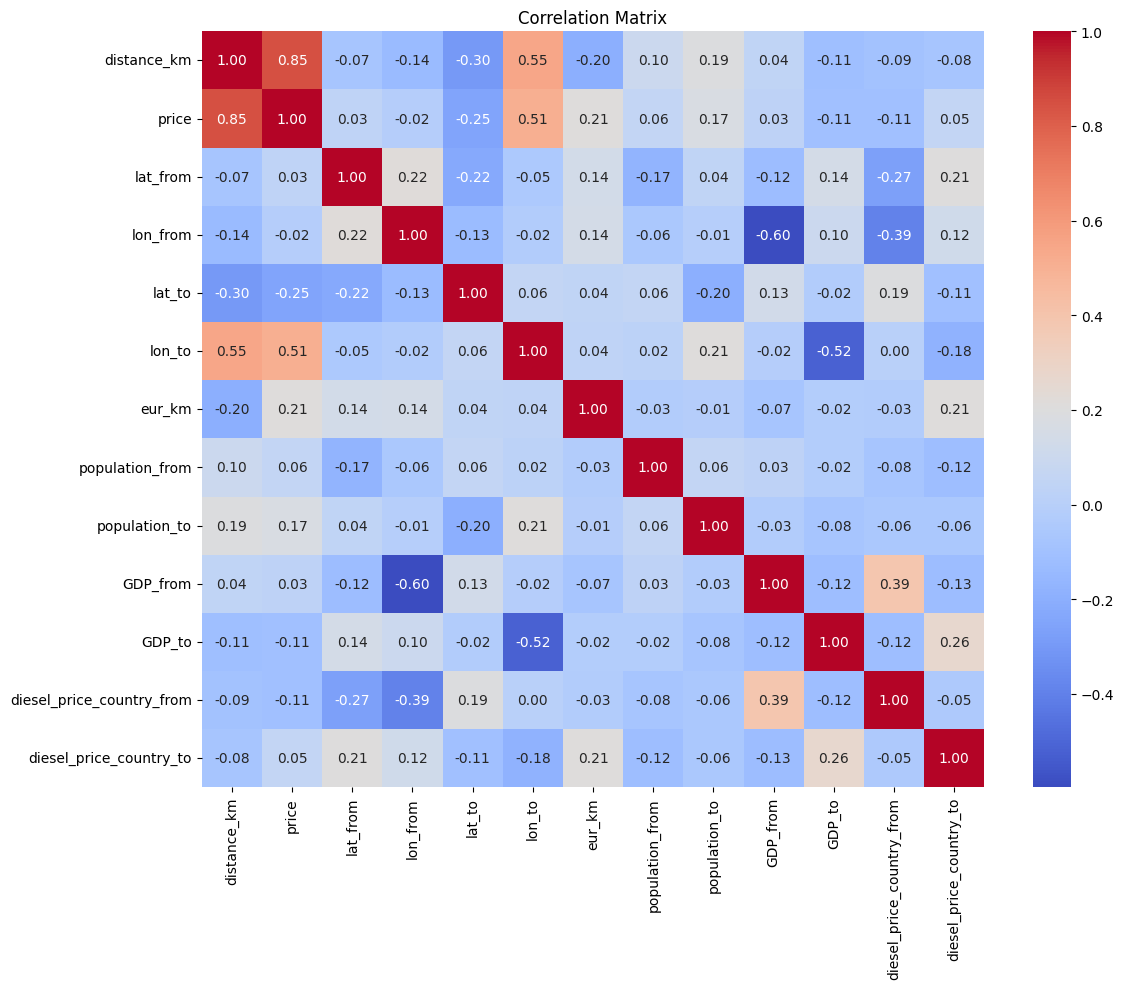

In [ ]:
# Compute the correlation matrix for all numeric features.
numeric_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

# Plot the correlation matrix.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

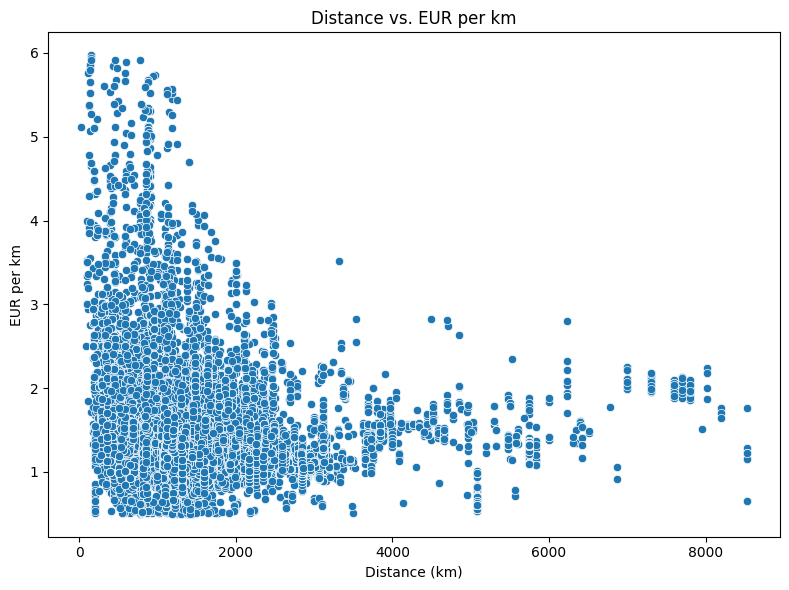

In [ ]:
# Example scatter plot: relationship between distance and price per km.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance_km', y='eur_km', data=df)
plt.title('Distance vs. EUR per km')
plt.xlabel('Distance (km)')
plt.ylabel('EUR per km')
plt.tight_layout()
plt.show()

In [ ]:
# descriptive statistics
print("Descriptive statistics:")
print(df.describe())

Descriptive statistics:
                                date   distance_km         price  \
count                          28427  28427.000000  28427.000000   
mean   2023-11-21 22:21:47.076476416   1584.741259   2219.277663   
min              2021-09-02 00:00:00     29.300000    104.864200   
25%              2023-08-03 00:00:00   1037.000000   1400.000000   
50%              2023-12-15 00:00:00   1340.000000   1800.000000   
75%              2024-03-19 00:00:00   1965.000000   2650.000000   
max              2024-12-27 16:27:34   8524.000000  18000.000000   
std                              NaN   1027.180172   1601.405543   

           lat_from      lon_from        lat_to        lon_to        eur_km  \
count  28427.000000  28427.000000  28427.000000  28427.000000  28427.000000   
mean      49.491450     14.395231     48.688868     19.019338      1.483038   
min       37.036639    -75.527670    -33.454400   -111.093731      0.500664   
25%       48.389927      8.235961     48.117342

In [ ]:
# # Plot average eur/km over time
# avg_eur_km = df.groupby(['year', 'month'])['eur_km'].mean()

# plt.figure(figsize=(14, 8))
# avg_eur_km.plot(marker='o')
# plt.title('Average EUR/km Over Time')
# plt.xlabel('Date')
# plt.ylabel('Average EUR/km')
# plt.grid(True)
# # plt.xticks(rotation=10)
# plt.tight_layout()
# plt.show()

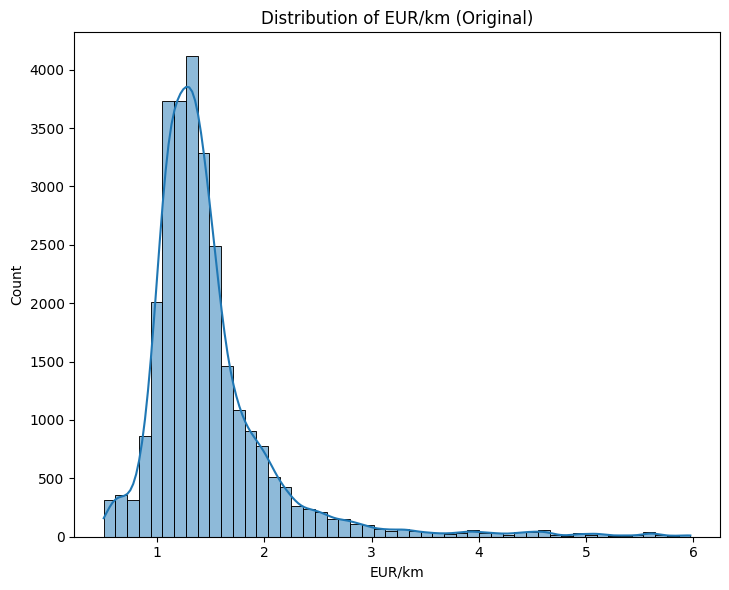

In [ ]:
# ===============================
# Distribution plots of eur/km
# ===============================
plt.figure(figsize=(14, 6))

# Original EUR/km
plt.subplot(1, 2, 1)
sns.histplot(df['eur_km'], kde=True, bins=50)
plt.title('Distribution of EUR/km (Original)')
plt.xlabel('EUR/km')

# # Normalized EUR/km
# plt.subplot(1, 2, 2)
# sns.histplot(df_ts['eur_km'], kde=True, bins=50)
# plt.title('Distribution of EUR/km (Normalized)')
# plt.xlabel('Normalized EUR/km')

plt.tight_layout()
plt.show()

In [ ]:
# # grouping by origin (country_from) and destination (country_to) using observed=True to limit to existing groups
# grouped = df.groupby(['country_from', 'country_to'], observed=True).agg(
#     avg_eur_km=('eur_km', 'mean'),
#     total_shipments=('id', 'count')
# ).reset_index()

# print("\nGrouped data (Origin - Destination):")
# print(grouped.head(10))  # Displaying only the first 10 rows for brevity

# # Plotting average EUR/KM by origin-destination pair for visual inspection
# plt.figure(figsize=(10,6))
# sns.barplot(x='country_from', y='avg_eur_km', hue='country_to', data=grouped)
# plt.title("Average EUR/KM by Origin and Destination Countries")
# plt.xlabel("Origin Country")
# plt.ylabel("Average EUR/KM")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

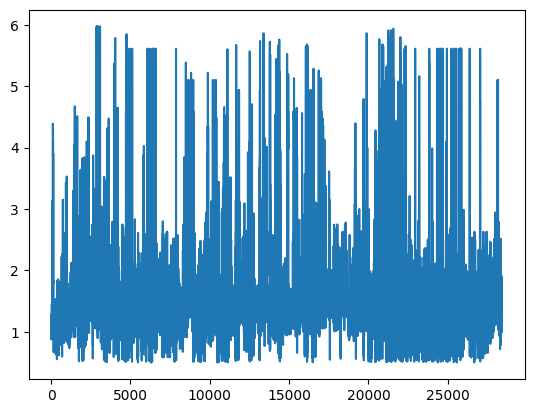

In [ ]:
plt.plot(df['eur_km'])
plt.show()

# To Export

In [ ]:
df.isna().sum() > 0

,0
id,False
date,False
country_from,False
city_from,False
zip_from,False
country_to,False
city_to,False
zip_to,False
validated_transport_type,False
distance_km,False


In [ ]:
df_tenders.isna().sum() > 0

,0
id,False
date,False
validated_transport_type,False
distance_km,False
status,False
lat_from,False
lon_from,False
lat_to,False
lon_to,False
city_from,False


In [ ]:
df.to_csv("/content/drive/MyDrive/diploma/Output datasets/df.csv", index=False)

In [ ]:
df_tenders.to_csv("/content/drive/MyDrive/diploma/Output datasets/df_tenders.csv", index=False)

In [ ]:
df1 = df[df.isna().any(axis=1)]
df1['id'].values

array([], dtype=object)

In [ ]:
df.shape

(28427, 24)

In [ ]:
df_tenders.shape

(1299, 25)